# Example of load model for detections



In [1]:
import time
import os
import argparse
import json
import cv2
import sys
sys.path += [os.path.abspath('keras-yolo3-master')]

from utils.utils import get_yolo_boxes, makedirs
from utils.bbox import draw_boxes
from tensorflow.keras.models import load_model
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

#detection_orto(infer_model, orto_image, div = [5,5], net_h = net_h, net_w = net_w, anchors
 #              obj_thresh = obj_thresh, nms_thresh = nms_thresh)
    

    
    
def detection_orto (infer_model, orto_image, div, net_h, net_w, anchors, obj_thresh, nms_thresh):
    
    div_h, div_w = div
    
    new_shape = [int(orto_image.shape[0] / div_h), int(orto_image.shape[1] / div_w)]
    
    final_boxes = []
    
    for h in range(div_h):
        for w in range(div_w):
            
            image = orto_image[new_shape[0]*h: new_shape[0]*(h + 1), new_shape[1]*w : new_shape[1]*(w + 1)]
            boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, anchors, obj_thresh, nms_thresh)[0]
            
            for box in boxes:
                box.xmin += new_shape[1]*w
                box.xmax += new_shape[1]*w
                box.ymin += new_shape[0]*h
                box.ymax += new_shape[0]*h
                final_boxes.append(box)
    return final_boxes


## ORTO PHOTO

(-0.5, 799.5, 399.5, -0.5)

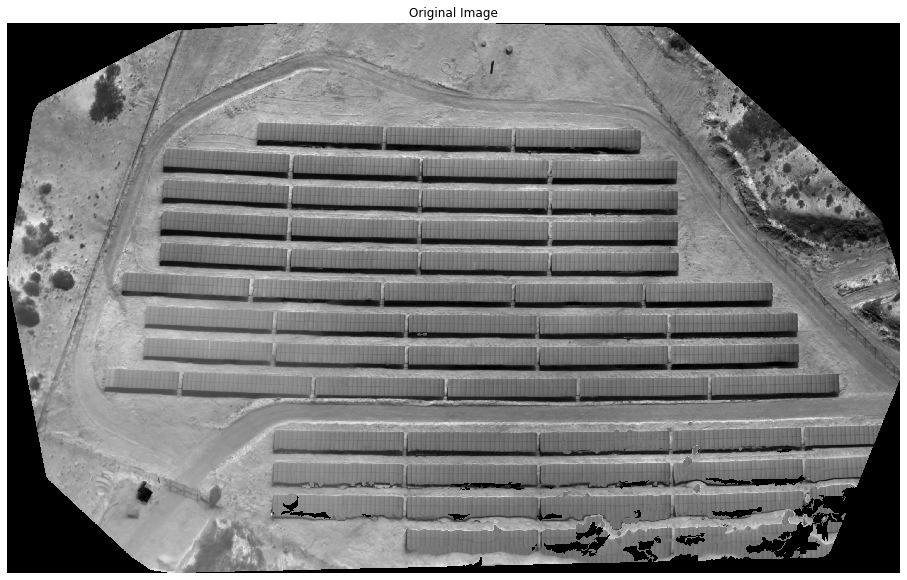

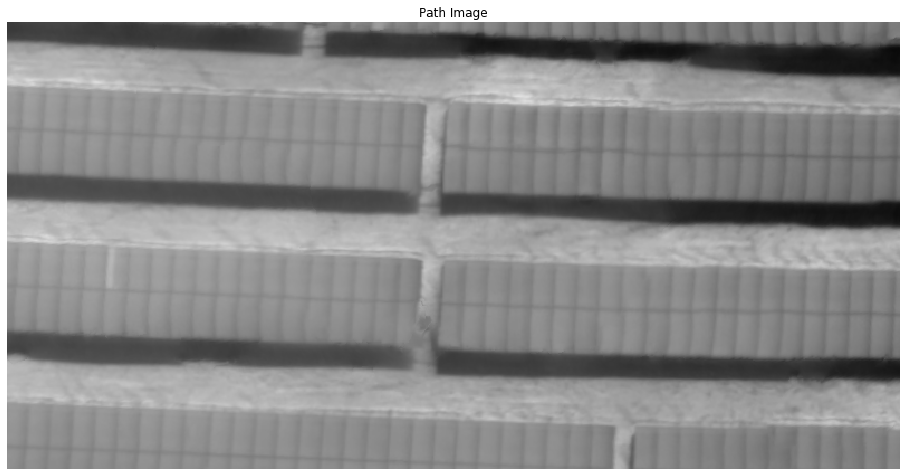

In [2]:
image_path = 'odm_orthophoto.tif' 

image = cv2.imread(image_path)

fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

sub_image = image[1200:1600, 800:1600]
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Path Image')
plt.imshow(sub_image, cmap='gray')
ax.axis('off') 

## Load Trained Model Soiling Fault

In [10]:
## Config of trained model, change this for use different trained model
config_path  = 'config_full_yolo_fault_1_infer.json' 

with open(config_path) as config_buffer:
        config = json.load(config_buffer)
                

###############################
#####   Load the model   ######
###############################
os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model(config['train']['saved_weights_name'])

## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45


#infer_model.summary()

## Detection Soling Fault

Elapsed time = 75.83608198165894


(-0.5, 3938.5, 2425.5, -0.5)

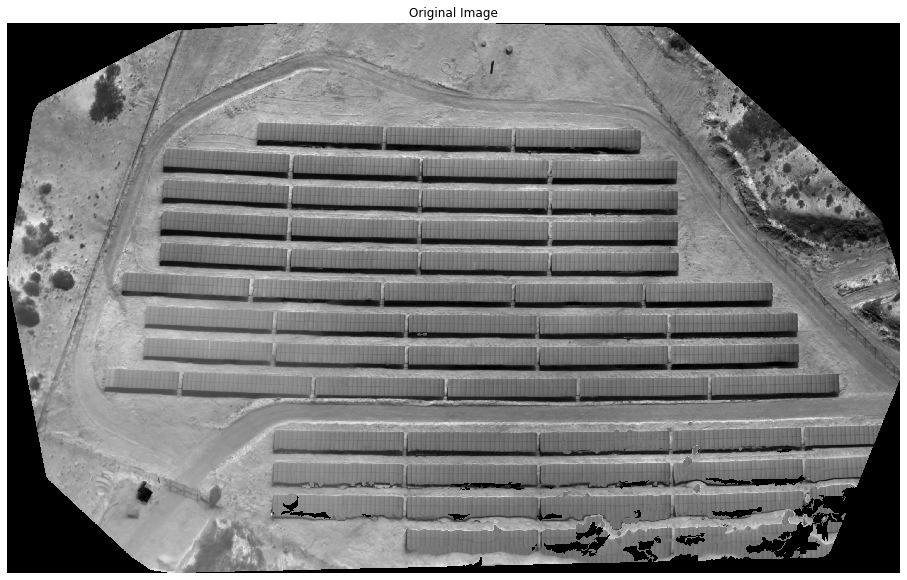

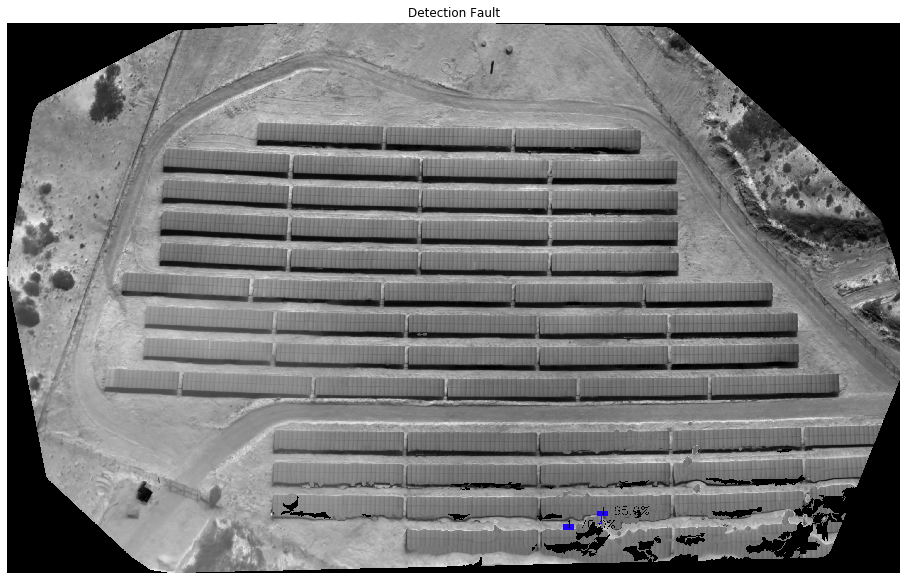

In [11]:
image_path = 'odm_orthophoto.tif' 
image = cv2.imread(image_path)

## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

start = time.time()
## predict the bounding boxes
#boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes = detection_orto(infer_model, orto_image = image, div = [6,6], net_h = net_h, net_w = net_w, 
               anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
print('Elapsed time = {}'.format(time.time() - start))
## draw bounding boxes on the image using labels
draw_boxes(image, boxes, config['model']['labels'], obj_thresh)


## Show Detection Fault
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection Fault')
plt.imshow(image, cmap='gray')
ax.axis('off') 
#plt.imsave('Diode Fault_6.png', image)

## Load Trained Model Diode Fault

In [5]:
## Config of trained model, change this for use different trained model
config_path  = 'config_full_yolo_fault_4_infer.json' 

with open(config_path) as config_buffer:
        config = json.load(config_buffer)
                

###############################
#####   Load the model   ######
###############################
os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model(config['train']['saved_weights_name'])

#infer_model.summary()

## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45

## Detection Diode Fault

Elapsed time = 97.27587413787842


(-0.5, 3938.5, 2425.5, -0.5)

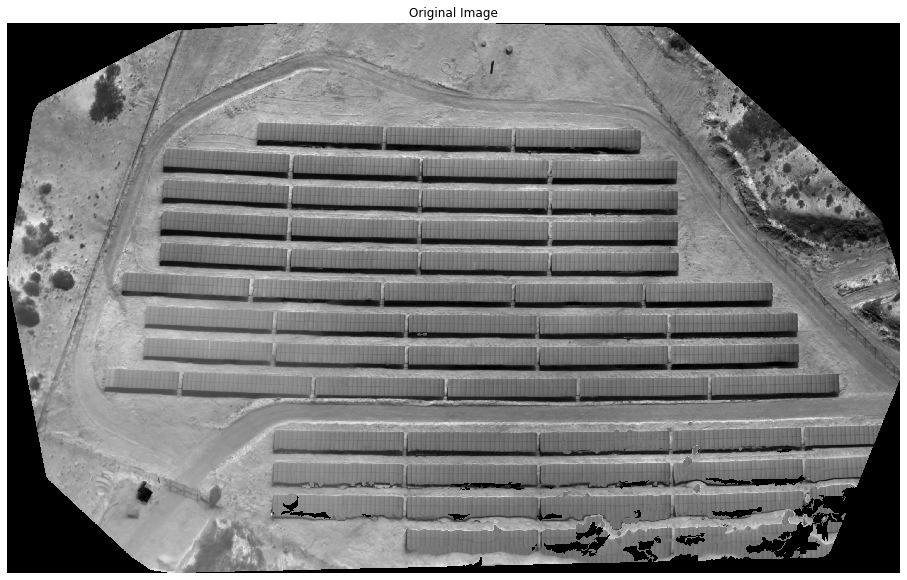

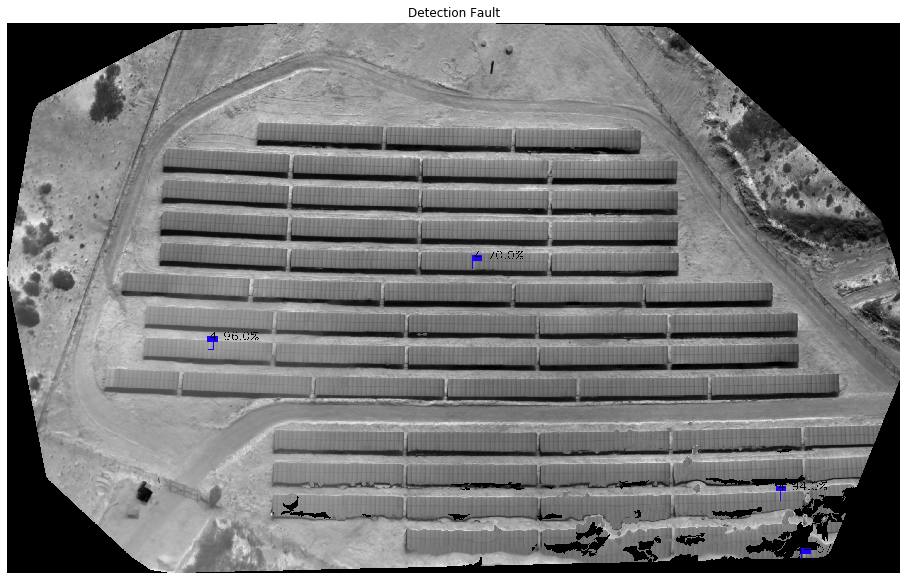

In [6]:
image_path = 'odm_orthophoto.tif' 


image = cv2.imread(image_path)

## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

start = time.time()
## predict the bounding boxes
#boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes = detection_orto(infer_model, orto_image = image, div = [6,6], net_h = net_h, net_w = net_w, 
               anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
print('Elapsed time = {}'.format(time.time() - start))
## draw bounding boxes on the image using labels
draw_boxes(image, boxes, config['model']['labels'], obj_thresh)


## Show Detection Fault
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection Fault')
plt.imshow(image, cmap='gray')
ax.axis('off') 

## Load Trained Model Panel Disconnect

In [2]:
## Config of trained model, change this for use different trained model
config_path  = 'config_full_yolo_panel_infer.json' 

with open(config_path) as config_buffer:
        config = json.load(config_buffer)
                

###############################
#####   Load the model   ######
###############################
os.environ['CUDA_VISIBLE_DEVICES'] = config['train']['gpus']
infer_model = load_model(config['train']['saved_weights_name'])

#infer_model.summary()

## Parameters of detection
net_h, net_w = 416, 416 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.3



## Detection Panel Disconnect

Elapsed time = 117.7064254283905


(-0.5, 3938.5, 2425.5, -0.5)

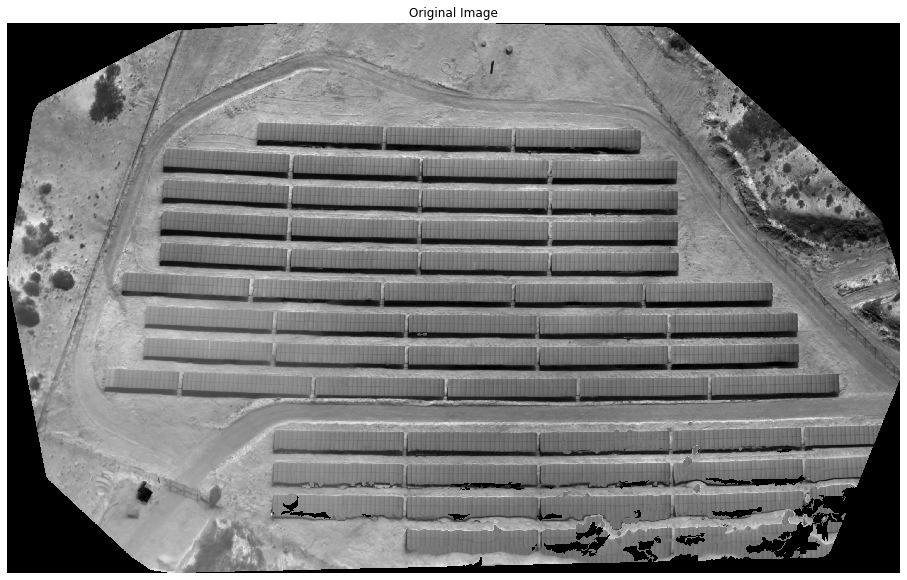

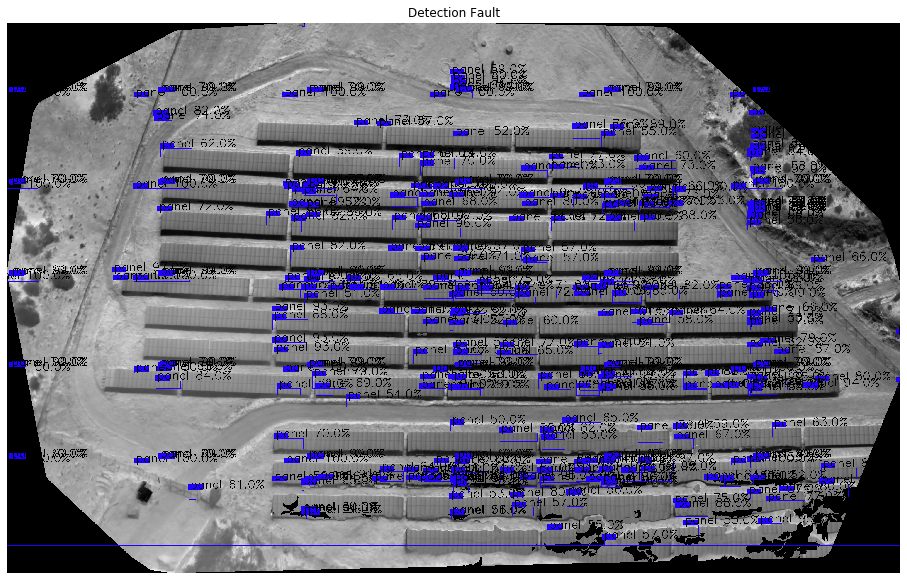

In [3]:
image_path = 'odm_orthophoto.tif' 


image = cv2.imread(image_path)

## Show original image
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Original Image')
plt.imshow(image, cmap='gray')
ax.axis('off') 

start = time.time()
## predict the bounding boxes
#boxes = get_yolo_boxes(infer_model, [image], net_h, net_w, config['model']['anchors'], obj_thresh, nms_thresh)[0]
boxes = detection_orto(infer_model, orto_image = image, div = [6,6], net_h = net_h, net_w = net_w, 
               anchors = config['model']['anchors'], obj_thresh = obj_thresh, nms_thresh = nms_thresh)
print('Elapsed time = {}'.format(time.time() - start))
## draw bounding boxes on the image using labels
draw_boxes(image, boxes, config['model']['labels'], obj_thresh)


## Show Detection Fault
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_title('Detection Fault')
plt.imshow(image, cmap='gray')
ax.axis('off') 

In [ ]:

#boxes = [[box for box in boxes_image if box.get_score() > obj_thresh] for boxes_image in boxes]

#print('Elapsed time = {}'.format(time.time() - start))
#times.append(time.time() - start)

#boxes_disc = [disconnect(image, boxes_image, z_thresh = 1.8) for image, boxes_image in zip(images, boxes)]